# Credit Card - Fraud Detection

Problem asks us to build a model to identify if a transaction is fraudulent or not. <br>
We have been provided dataset along with label if it was fraudulent or not. We can thus train a supervised model for this classfication problem.

•	Understanding -Problem statement<br>
•	Perform exploratory data analysis<br>
•	Preprocess the data<br>
•	Select Training data, test data <br>
•	Train the model <br>
•	Test the model (Predictions and reporting)<br>
•	Evaluate the model performance<br>
•	Suggest ways of improving the model

## Loading Data

In [1]:
import pandas as pd      
df = pd.read_csv("card_transdata.csv")

In [2]:
df.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
356808,7.289094,0.843470,0.596319,1.0,1.0,0.0,1.0,0.0
73325,1.504348,0.450821,1.606961,0.0,0.0,0.0,0.0,0.0
945763,10.396480,0.077177,4.061026,1.0,0.0,0.0,1.0,1.0
322293,3.366023,0.135384,0.919810,1.0,0.0,0.0,1.0,0.0
177748,7.416414,1.122523,1.310287,1.0,0.0,0.0,1.0,0.0
388676,20.607619,0.131462,0.781278,1.0,1.0,1.0,1.0,0.0
609865,7.832033,0.590431,3.794763,1.0,0.0,0.0,1.0,0.0
130190,9.839841,1.219610,1.107928,1.0,0.0,0.0,1.0,0.0
858048,5.970506,0.059509,7.968341,1.0,0.0,0.0,0.0,0.0
800353,99.840446,0.585814,2.916586,1.0,1.0,1.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


As all values in all rows are non-null, we dont need to handle missing data in this case.

In [4]:
df_fraud = df.loc[df['fraud']==1]
print("Frauds :: {}".format(len(df_fraud)))
df_not_fraud = df.loc[df['fraud']==0]
print("Not Frauds :: {}".format(len(df_not_fraud)))
print("Percentage of fraud data :: {} %".format((len(df_fraud)/len(df))*100))

Frauds :: 87403
Not Frauds :: 912597
Percentage of fraud data :: 8.7403 %


## Check distrubution of data

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


## Plot correlation heat map

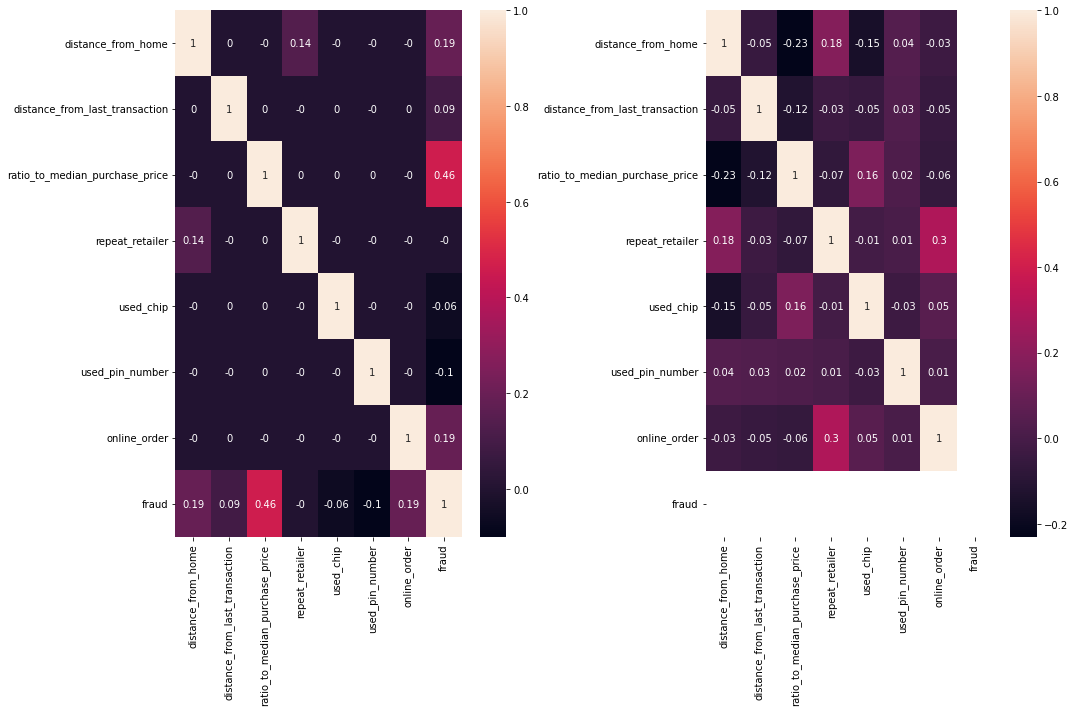

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt   

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
sns.heatmap(round(df.corr(),2), annot=True, ax=ax1)
sns.heatmap(round(df_fraud.corr(),2), annot=True, ax=ax2)
plt.tight_layout()
plt.show()

In [8]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_fraud, title="Pandas Profiling Report")
# profile

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df_transform = pca.fit_transform(df)
df_transform.shape

(1000000, 2)

In [11]:
from sklearn.cluster import KMeans  

kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(df_transform)  

In [12]:
len(df_transform[y_predict == 0 , 0])

983177

In [13]:
len(df_transform[y_predict == 1 , 0])

16823

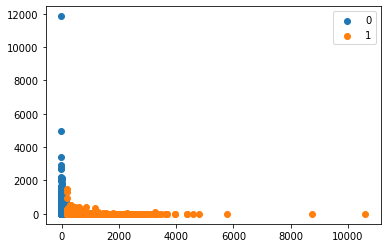

In [15]:
u_labels = np.unique(y_predict)
 
for i in u_labels:
    plt.scatter(df_transform[y_predict == i , 0] , df_transform[y_predict == i , 1] , label = i)
plt.legend()
plt.show()

Now training a decision tree model for further exploratory analysis and mining rules from it

In [16]:
X = df.loc[:, df.columns != 'fraud']
y = df.fraud

In [17]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
model = clf.fit(X, y)

In [18]:
text_representation = tree.export_text(clf)
# print(text_representation)

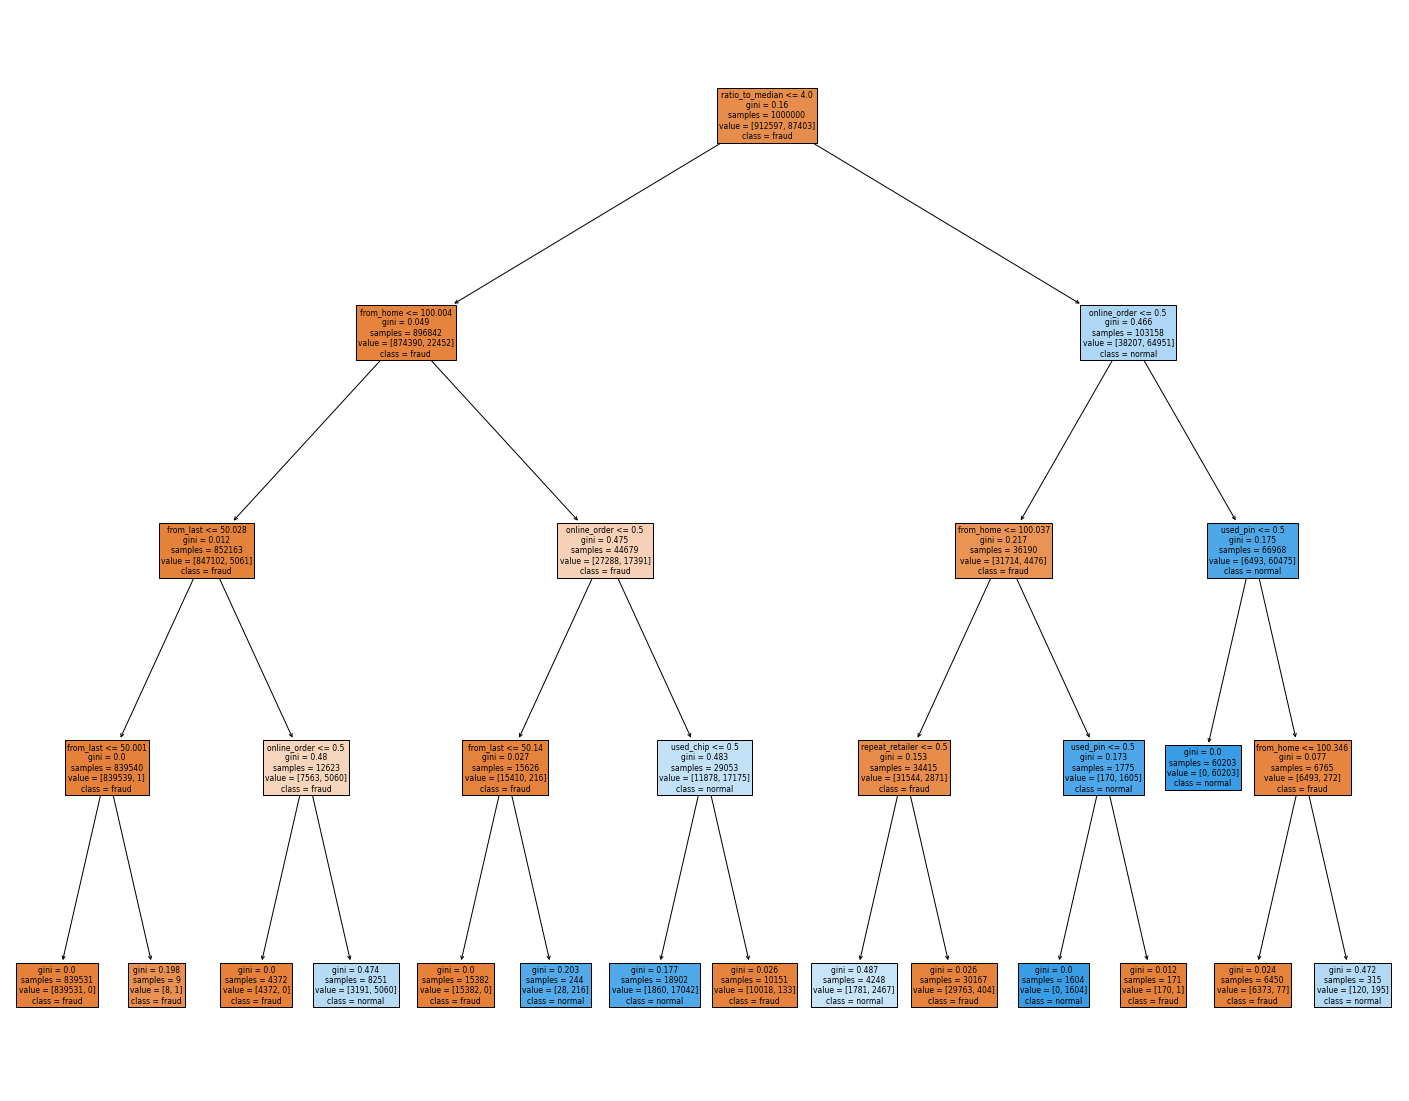

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=['from_home','from_last','ratio_to_median','repeat_retailer','used_chip','used_pin', 'online_order'	],
                   class_names=['fraud','normal'],
                   filled=True)